# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [3]:
df_shape = df.shape
print (f'Набір даних містить {df_shape[0]} рядків та {df_shape[1]} колонок')

Набір даних містить 10886 рядків та 19 колонок


In [4]:
df.head (11)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,5
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011-01-01,1,52,5,Saturday,2011,1,6
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011-01-01,1,52,5,Saturday,2011,1,7
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011-01-01,1,52,5,Saturday,2011,1,8


Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

В одному рядку даних міститься інформація за одну годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [5]:
daily_count = df ['count'].resample('D').sum()

In [6]:
filt_daily_count = daily_count [daily_count.index.day < 20]

In [7]:
filt_daily_count [5:25]

,count
datetime,
2011-01-06,1606
2011-01-07,1510
2011-01-08,959
2011-01-09,822
2011-01-10,1321
2011-01-11,1263
2011-01-12,1162
2011-01-13,1406
2011-01-14,1421


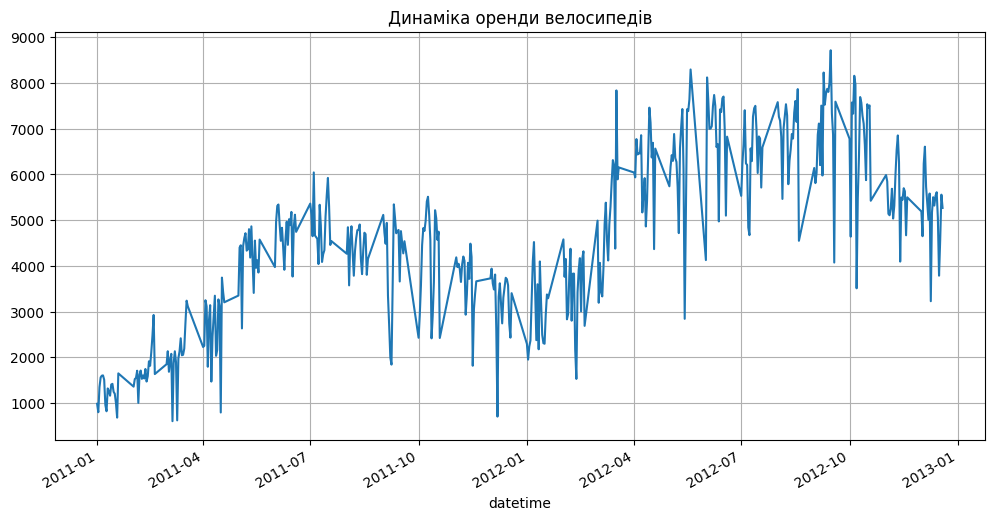

In [8]:
filt_daily_count.plot.line(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    grid=True
)
plt.show()

1. Графік має "заломи" через динамічність попиту з боку користувачів, а також через високу деталізацію графіку. Через те що один день був більший попит, інший - менший от і виникають такі "заломи". Іх можна прибрати зменшивши деталізацію, зробити графік не поденно, а потижнево або помісячно, наприклад.

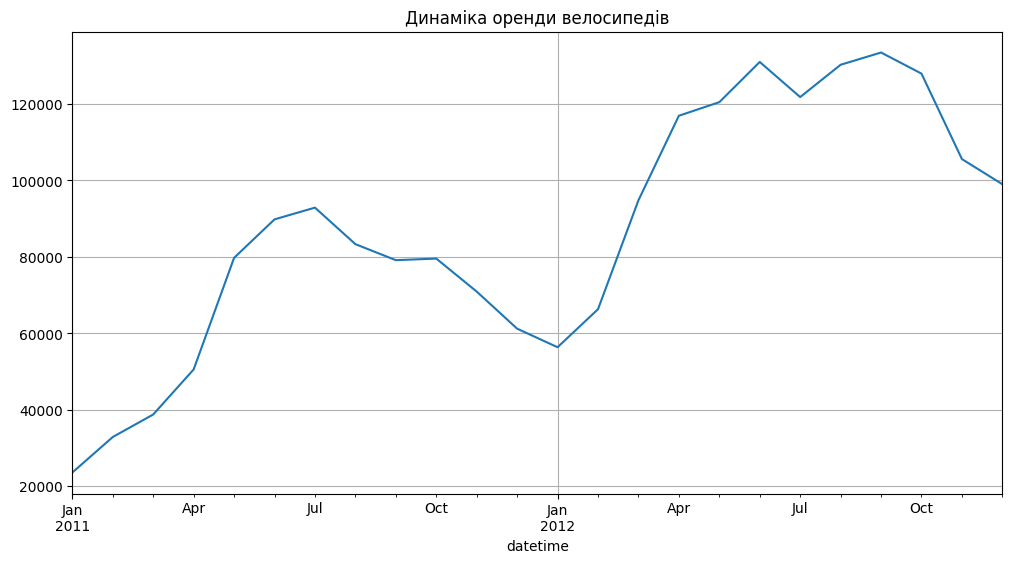

In [9]:
monthly_count = df ['count'].resample('ME').sum()
monthly_count.plot.line(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    grid=True
)
plt.show()

2. З графіку видно, що кількість орендваних велосипедів зменшується в зимові місяці. А також, що у 2012 році відбулося загальне зростання кількості оренд на 30-50% в різні місяці у порівнянні з попереднім 2011 роком.

3. Як я вже згадував у попередньому пункті, кількіть орендованих велосипедів знижується у зимові місяці, є найвищою у літні і весною/восени середня кількість.

4. Трапляються періоди з аномально низькими або високими показниками, але ці періоди складають день/кілька днів. Такі показники скоріш за все пов'язані з погодою в ці дні, або якимись особливими подіями, які проходили в тій місцевості (свята, фестивалі і т.д.)


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

В нашому df колонка season відповідає скоріш поняттю "квартал", а не "сезон" ("1" стоїть там де місяці 1, 2, 3, "2" - там де 4, 5, 6 і т.д.).
Тому пропоную створити нову колонку і для зручності одразу з назвами сезонів.

In [10]:
df ['Season_R'] = df ['month'].apply(lambda m:
                        'Зима'if m in [12, 1, 2] else
                        'Весна' if m in [3, 4, 5] else
                        'Літо' if m in [6, 7, 8] else
                        'Осінь'
)

In [11]:
season_count = df.groupby('Season_R') ['count'].mean()
season_ord = ['Зима','Весна', 'Літо', 'Осінь']
season_count_ord = season_count.reindex(season_ord)

In [12]:
season_count_ord.round(2)

,count
Season_R,
Зима,125.75
Весна,184.07
Літо,237.16
Осінь,218.38


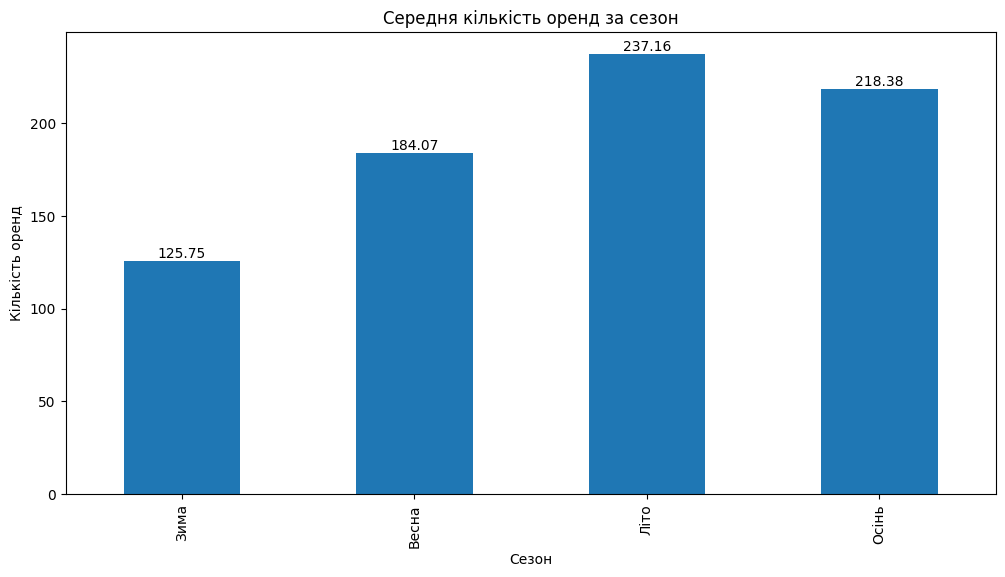

In [15]:
ax_bar = season_count_ord.plot.bar(
    figsize=(12, 6),
    title='Середня кількість оренд за сезон',
    ylabel='Кількість оренд',
    xlabel='Сезон'
)
ax_bar.bar_label(ax_bar.containers[0], fmt='%.2f')
plt.show()

1. Найбільша середня кількість оренди велосипедів влітку.
2. На мою думку, це пов'язано перш за все зі сприятливими погодними умовами, так як все ж таки велосипед не надто всепогодний вид транспорту.
3. Різниця в оренді між найпопулярнішим сезоном влітку і найменш популярним взимку майже в 2 рази: 237,16/125,75 = 1,89

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [16]:
monthly_count_m = df.groupby ('month') ['count'].mean()


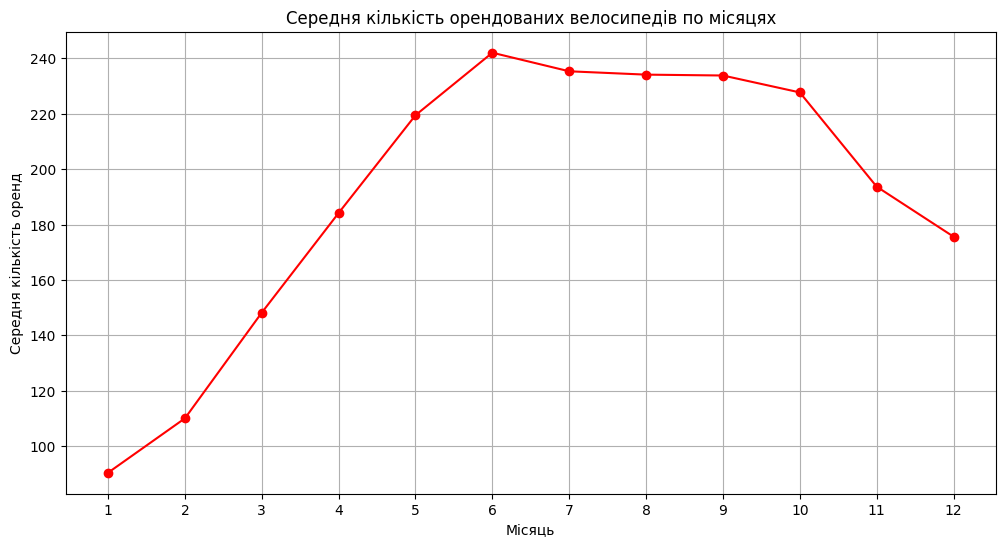

In [17]:
ax_line = monthly_count_m.plot.line(
    marker='o',
    color='red',
    figsize=(12, 6),
    title='Середня кількість орендованих велосипедів по місяцях',
    ylabel='Середня кількість оренд',
    xlabel='Місяць',
    grid=True
)
ax_line.set_xticks(monthly_count_m.index)
plt.show()

1. Пік оренди спостерігається у червні і тримається на високому рівні протягом всіх літніх місяців, а також перших місяців осені. Спад спостерігається протягом зимових місяців і на початку весни (березень).
2. Це повністю збігається з результатами попереднього спостереження, що логічно.
3. Клімат значно впливає на оренду велосипедів. У країнах з помірним кліматом оренда може бути на досить високому рівні протягом всього року. Тоді як у країнах, наприклад, з арктичним кліматом діяльність може повністю зупинятись у зимовий час.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [18]:
weather_count_total = df ['weather'].value_counts().sort_index()
weather_count_total

,count
weather,
1,7192
2,2834
3,859
4,1


In [19]:
custom_colors = ['#87CEEB',
                 '#B0C4DE',
                 '#6A5ACD',
                 '#483D8B']

In [20]:
weather_legend_labels = {
    1: '1=Ясно',
    2: '2=Туман',
    3: '3=Легкий дощ',
    4: '4=Сильний дощ'
}
custom_legend_labels = [weather_legend_labels[code] for code in weather_count_total.index]

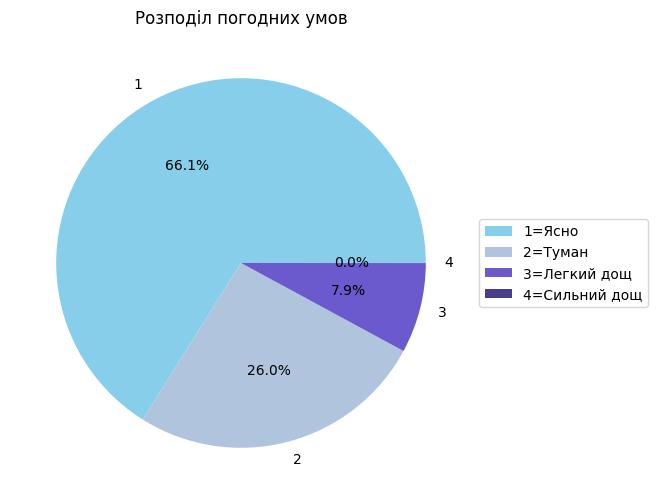

In [21]:
weather_count_total.plot.pie (
    figsize=(12, 6),
    autopct='%1.1f%%',
    title='Розподіл погодних умов',
    ylabel='',
    colors= custom_colors
)
plt.legend(
    labels=custom_legend_labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.show()

1. В датасеті 66% всього часу була ясна погода.
2. За весь час лише 1 година сильного дошу, тобто можна вважати що був 1 день із сильним дощем. Частка сильного дощу у датасеті складає 1/10886.
3. Як вже багато разів згадувалося погані погодні умови знижують попит на аренду велосипедів, через конструктивні особливості цього транспортного засобу.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [26]:
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

In [28]:
df ['weather_names'] = df ['weather'].map(weather_map)

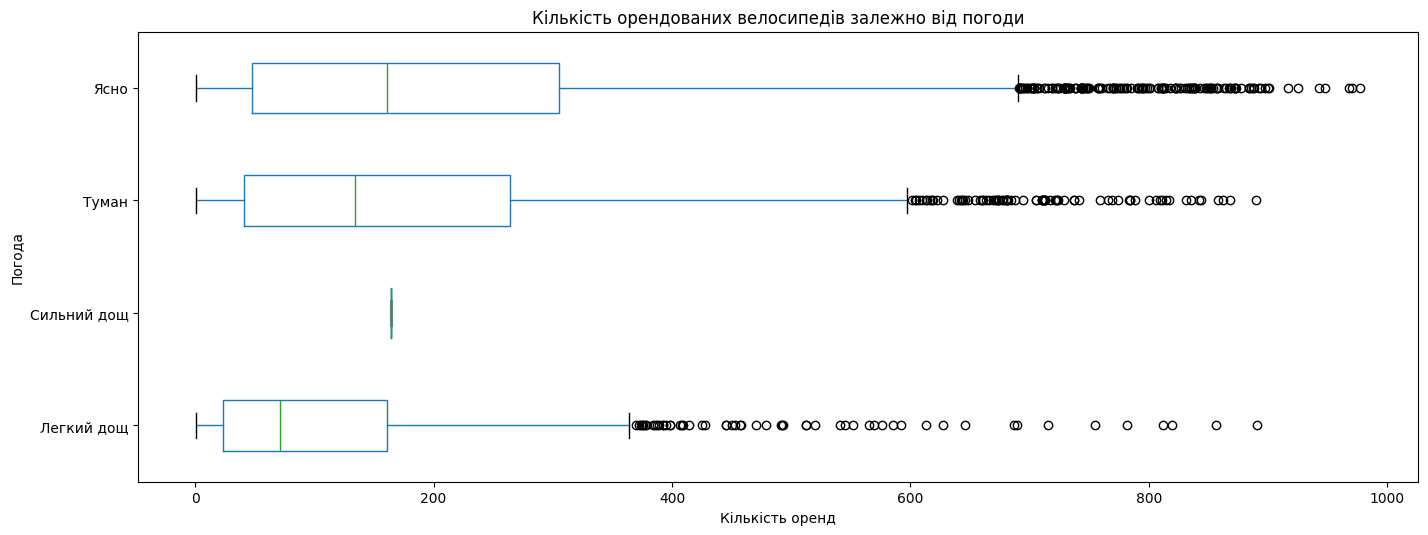

In [30]:
df.boxplot(
    column='count',
    by='weather_names',
    figsize=(16, 6),
    grid=False,
    vert=False
)
plt.title ('Кількість орендованих велосипедів залежно від погоди')
plt.suptitle ('')
plt.ylabel ('Погода')
plt.xlabel ('Кількість оренд')
plt.show()

1. Найбільший розкид у кількості оренди при ясній погоді. Думаю, це логічно, адже там найбільше значень.
2. Так, викиди в даних є. При будь-якій погоді, окрім "сильного дошу". Але "сильний дощ" то сам по собі викид. Там всього одне значеня.
3. Виглядає ніби найбільше медіанне значення оренди при погоді "сильний дощ", але як уже згадувалося у цій категшорії у нас лише одне значення тому можна цим знехтувати. І якщо так, то найвище медіанне значення при ясній погоді і воно близьке якщо не рівне значенню при сильному дощу.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

Пам'ятаємо, що колонка season у нас не дуже точна, а параметр "с" у scatter plot не хоче сприймати назви сезонів з колонки Season_R тому що вони str. Створимо ще одну колонку для коректного позначення сезонів цифрами

In [36]:
df ['Season_N'] = df ['month'].apply(lambda m:
                        4 if m in [12, 1, 2] else
                        1 if m in [3, 4, 5] else
                        2 if m in [6, 7, 8] else
                        3
)

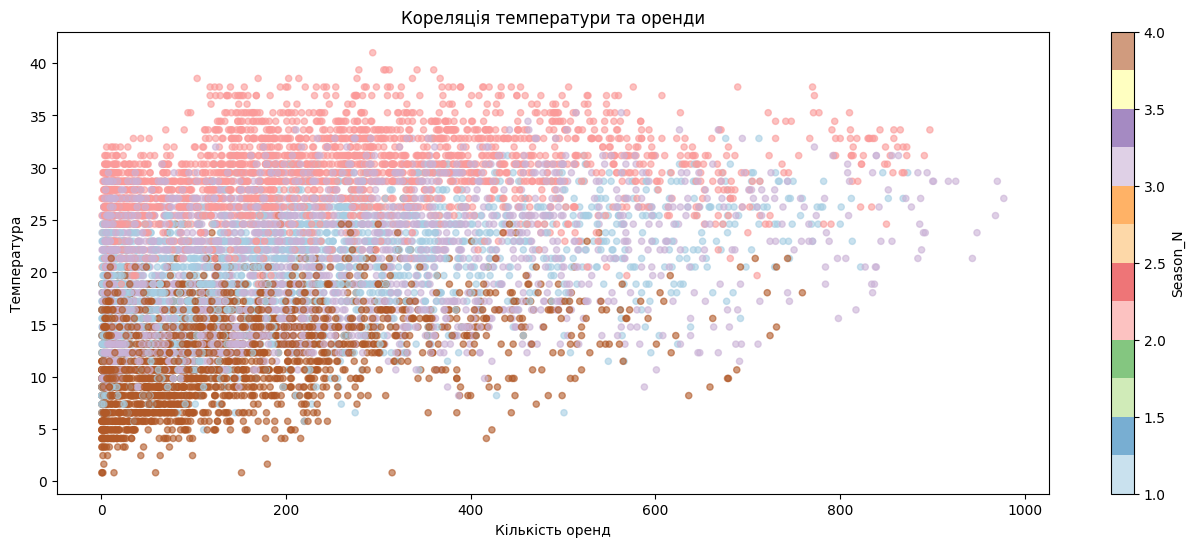

In [38]:
df.plot.scatter (
    x='count',
    y='temp',
    c='Season_N',
    figsize=(16, 6),
    grid=False,
    alpha=0.6,
    colormap='Paired'
)
plt.title ('Кореляція температури та оренди')
plt.ylabel ('Температура')
plt.xlabel ('Кількість оренд')
plt.show()

Зв'язок безумовно присутній, можемо говорити про позитивну кореляцію (графік рухається вправо-вгору), але до певної межі (на мою думку приблизно до 25-30 градусів) після якої кореляція негативна. До того ж ми аналізуємо дані одразу за два роки в одному з яких показники кількості оренд на 30-50% вищі ніж в іншому, це трохи ускладнює інтерпретацію графіку.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [40]:
dif_users = df.groupby('weekday') [['casual', 'registered']].mean()
wd_ord = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
diff_users_ord = dif_users.reindex(wd_ord)
diff_users_ord

,casual,registered
weekday,,
Monday,29.843972,160.546744
Tuesday,22.979207,166.744639
Wednesday,22.521599,165.889749
Thursday,24.007083,173.289118
Friday,31.001962,166.842381
Saturday,63.625000,133.040404
Sunday,57.051298,123.788474


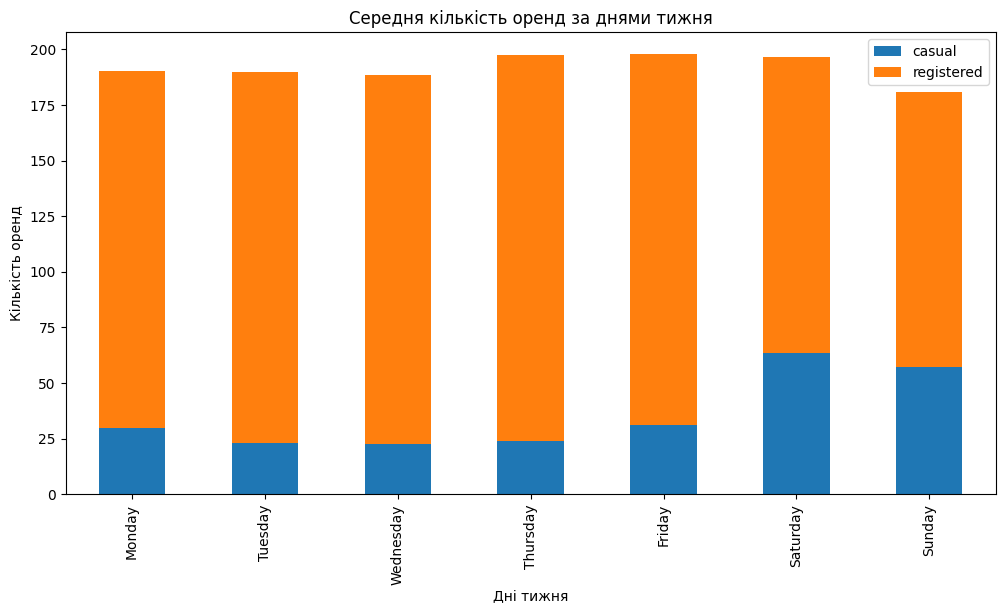

In [46]:
ax_bar_wd = diff_users_ord.plot.bar(
    figsize=(12, 6),
    stacked=True,
    title='Середня кількість оренд за днями тижня',
    ylabel='Кількість оренд',
    xlabel='Дні тижня'
)

plt.show()

1. Найбільше оренд від зареєстрованих користувачів у четвер (173.29 в середньому), далі йдуть п'ятниця і вівторок (166,84 і 166,74 відповідно).
2. Можливо, зареєстровані користувачі це ті хто використовують велосипеди для щоденних поїздок на роботу/навчання, як альтернативу громадському транспорту. У вихідні кількість оренд від зареєстрованих користувачів зменшується, але вони можуть всеж іх використовувати для інших поїздок, а дехто працює і у вихідні. Випадкові користувачі більше користуються сервісом у вихідні, це можуть бути туристи або місцеві жителі які користуються велосипедами для розваг та нерегулярних незапланованих поїздок.